<a href="https://www.kaggle.com/code/khelifayacine/playground-series-saison-4-pisode-10?scriptVersionId=200156915" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


# Exploration des données :

In [2]:
# Importation des packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Package modélisation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV




In [3]:
# Importation des données 
df_train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
df_test = pd.read_csv ("/kaggle/input/playground-series-s4e10/test.csv")
df_train.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


Description des colonnes :
- id : Identifiant unique pour chaque observation.
- person_age : Âge du demandeur de prêt.
- person_income : Revenu annuel du demandeur.
- person_home_ownership : Statut de propriété du logement (par exemple : RENT, OWN, MORTGAGE).
- person_emp_length : Nombre d'années d'emploi du demandeur.
- loan_intent : Raison du prêt (par exemple : EDUCATION, MEDICAL, VENTURE).
- loan_grade : Classement du prêt attribué (par exemple : A, B, C).
- loan_amnt : Montant demandé pour le prêt.
- loan_int_rate : Taux d'intérêt du prêt.
- loan_percent_income : Proportion du revenu du demandeur par rapport au montant du prêt.
- cb_person_default_on_file : Indicateur de défaut de paiement dans l'historique de crédit du demandeur (Y/N).
- cb_person_cred_hist_length : Durée de l'historique de crédit du demandeur (en années).
- loan_status : Statut du prêt (0 pour refusé, 1 pour approuvé).

In [4]:
df_test.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
5,58650,23,66000,RENT,5.0,EDUCATION,D,22000,14.09,0.33,N,2
6,58651,26,75000,OWN,10.0,PERSONAL,B,8000,10.62,0.11,N,4
7,58652,23,55000,MORTGAGE,6.0,PERSONAL,A,6250,6.76,0.12,N,2
8,58653,32,29124,RENT,0.0,PERSONAL,C,7200,13.11,0.26,Y,6
9,58654,22,90000,RENT,4.0,DEBTCONSOLIDATION,C,10000,13.49,0.11,Y,3


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
#Analyse de valeurs manquantes
df_train.isna().sum()#aucune valeure manquante !

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
#Analyse des statistiques descriptives :
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


## DataViz

1. Visualisation de la distribution de la cible (loan_status) :

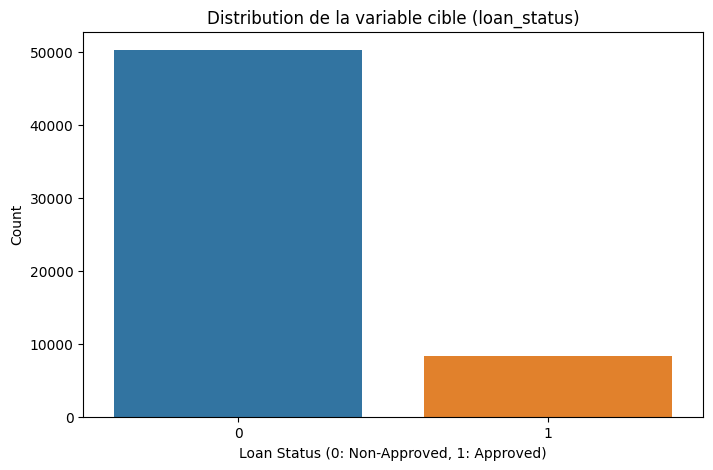

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='loan_status')
plt.title('Distribution de la variable cible (loan_status)')
plt.xlabel('Loan Status (0: Non-Approved, 1: Approved)')
plt.ylabel('Count')
plt.show()

2. Vérification des corrélations entre les variables numériques :

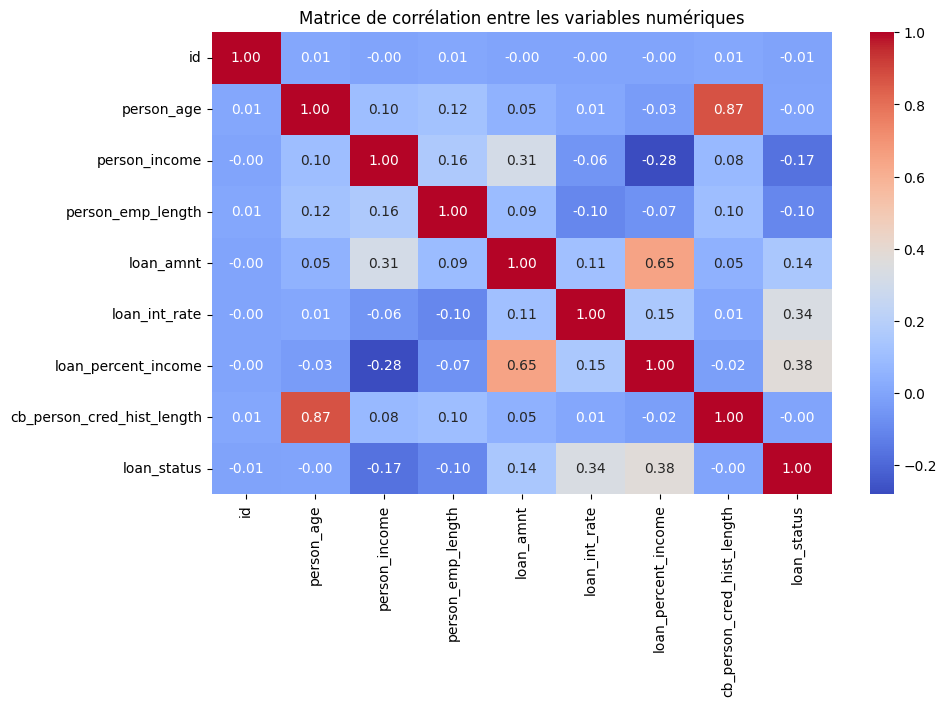

In [9]:
# Sélectionner les colonnes numériques uniquement
numerical_cols = df_train.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation
corr_matrix = numerical_cols.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()



Étape 2 : Visualisation des Relations

3) Visualisation des relations entre les caractéristiques et la cible :

Age et Loan Status :

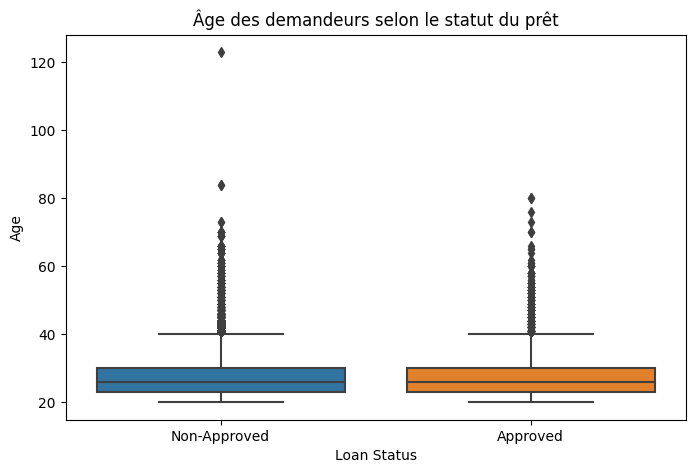

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='loan_status', y='person_age')
plt.title('Âge des demandeurs selon le statut du prêt')
plt.xlabel('Loan Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Approved', 'Approved'])
plt.show()


Revenu et Loan Status :

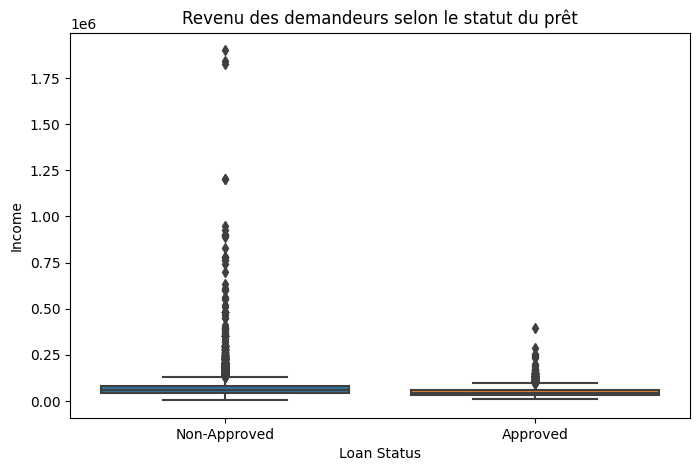

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='loan_status', y='person_income')
plt.title('Revenu des demandeurs selon le statut du prêt')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.xticks([0, 1], ['Non-Approved', 'Approved'])
plt.show()


4) Visualisation des catégories :

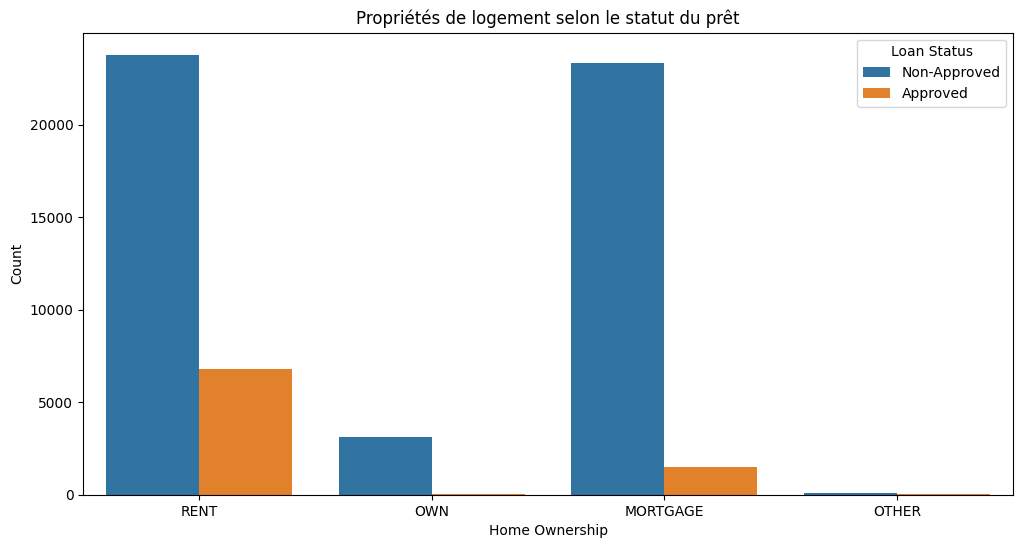

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='person_home_ownership', hue='loan_status')
plt.title('Propriétés de logement selon le statut du prêt')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Approved', 'Approved'])
plt.show()


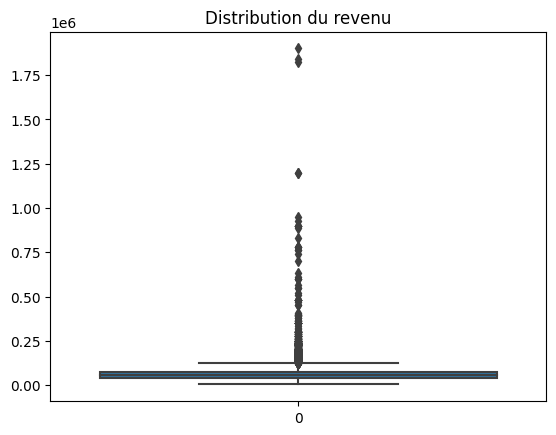

In [13]:

sns.boxplot(df_train['person_income'])
plt.title('Distribution du revenu')
plt.show()


Visualisation des distributions avec KDE (Estimation de Densité Noyau) :

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


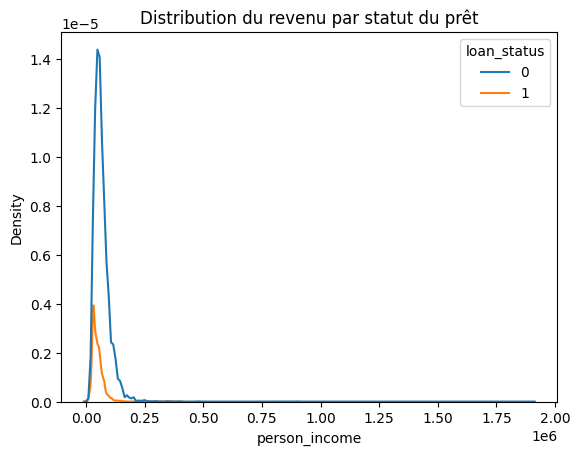

In [14]:
sns.kdeplot(df_train, x='person_income',hue='loan_status')
plt.title('Distribution du revenu par statut du prêt')
plt.show()

Statistiques sur les outliers : 
- Calculer le nombre d'observations qui sont considérées comme des outliers. Cela peut être fait en utilisant l'écart interquartile (IQR) pour définir des seuils.

In [15]:
Q1 = df_train['person_income'].quantile(0.25)
Q3 = df_train['person_income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_train[(df_train['person_income'] < (Q1 - 1.5 * IQR)) | (df_train['person_income'] > (Q3 + 1.5 * IQR))]
print(f"Nombre d'outliers dans person_income : {len(outliers)}")


Nombre d'outliers dans person_income : 2411


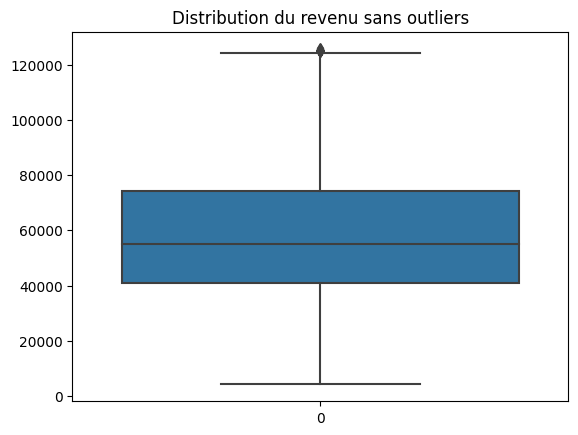

In [16]:
sns.boxplot(df_train[df_train['person_income'] < (Q3 + 1.5 * IQR)]['person_income'])
plt.title('Distribution du revenu sans outliers')
plt.show()


Distribution log-transformée :
- Si les valeurs extrêmes sont légitimes et qu'il est nécessaire de travailler avec ces données, appliquer une transformation logarithmique peut aider à normaliser la distribution.

Résumé des Étapes d'EDA :
- Visualisation de la distribution de la variable cible pour voir la balance des classes.
- Analyse descriptive pour comprendre les caractéristiques des données.
- Corrélations pour identifier les relations entre les variables.
- Visualisation des relations entre les caractéristiques et la cible pour mieux comprendre l'impact de chaque variable.

# Preprocessing de données 

Encodage des variables df_train

In [17]:
label_encoder = LabelEncoder()
df_train['person_home_ownership'] = label_encoder.fit_transform(df_train['person_home_ownership'])
df_train['loan_intent'] = label_encoder.fit_transform(df_train['loan_intent'])
df_train['loan_grade'] = label_encoder.fit_transform(df_train['loan_grade'])
df_train['cb_person_default_on_file'] = label_encoder.fit_transform(df_train['cb_person_default_on_file'])

In [18]:
df_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  int64  
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  int64  
 6   loan_grade                  58645 non-null  int64  
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  int64  
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(10)
memory

Encodage du dataset df_test

In [19]:
df_test['person_home_ownership'] = label_encoder.fit_transform(df_test['person_home_ownership'])
df_test['loan_intent'] = label_encoder.fit_transform(df_test['loan_intent'])
df_test['loan_grade'] = label_encoder.fit_transform(df_test['loan_grade'])
df_test['cb_person_default_on_file'] = label_encoder.fit_transform(df_test['cb_person_default_on_file'])


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  int64  
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  int64  
 6   loan_grade                  39098 non-null  int64  
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  int64  
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.6 MB


In [21]:
# Vérifier si les colonnes de df_train (sans la cible) et df_test correspondent
train_columns = df_train.drop(columns=['loan_status']).columns
test_columns = df_test.columns

# Vérification des différences
if set(train_columns) != set(test_columns):
    print("Les colonnes entre df_train et df_test ne correspondent pas.")
    print("Colonnes manquantes dans df_test :", set(train_columns) - set(test_columns))
    print("Colonnes supplémentaires dans df_test :", set(test_columns) - set(train_columns))
else:
    print("Les colonnes correspondent.")


Les colonnes correspondent.


5. Séparation des données en train/test (Validation) :

Avant d'entraîner ton modèle, il est nécessaire de séparer notre dataset en données d'entraînement et de test pour éviter le surapprentissage et tester la généralisation du modèle.

In [22]:
from sklearn.model_selection import train_test_split

# Séparation des données (80% train, 20% test)
X = df_train.drop('loan_status', axis=1)
y = df_train['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modélisation 

1. Choix du modèle :

Plusieurs modèles peuvent être testés, par exemple :
- Régression Logistique
- Arbres de décision
- Random Forest
- Gradient Boosting
- XGBoost
- LightGBM

In [23]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
model_log_reg = LogisticRegression(max_iter=1000)
model_log_reg.fit(X, y)
log_reg_acc = cross_val_score(model_log_reg, X, y, cv=5, scoring='accuracy').mean()
log_reg_roc_auc = cross_val_score(model_log_reg, X, y, cv=5, scoring='roc_auc').mean()

print(f"Logistic Regression - Accuracy: {log_reg_acc:.4f}, ROC AUC (CV 5 folds): {log_reg_roc_auc:.4f}")

Logistic Regression - Accuracy: 0.8757, ROC AUC (CV 5 folds): 0.8342


In [24]:
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
rf_acc = cross_val_score(model_rf, X, y, cv=5, scoring='accuracy').mean()
rf_roc_auc = cross_val_score(model_rf, X, y, cv=5, scoring='roc_auc').mean()

print(f"Random Forest - Accuracy: {rf_acc:.4f}, ROC AUC (CV 5 folds): {rf_roc_auc:.4f}")

Random Forest - Accuracy: 0.8133, ROC AUC (CV 5 folds): 0.9169


In [25]:
# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X, y)
knn_acc = cross_val_score(model_knn, X, y, cv=5, scoring='accuracy').mean()
knn_roc_auc = cross_val_score(model_knn, X, y, cv=5, scoring='roc_auc').mean()

print(f"KNN - Accuracy: {knn_acc:.4f}, ROC AUC (CV 5 folds): {knn_roc_auc:.4f}")

KNN - Accuracy: 0.8360, ROC AUC (CV 5 folds): 0.7081


In [26]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)
dt_acc = cross_val_score(model_dt, X, y, cv=5, scoring='accuracy').mean()
dt_roc_auc = cross_val_score(model_dt, X, y, cv=5, scoring='roc_auc').mean()

print(f"Decision Tree - Accuracy: {dt_acc:.4f}, ROC AUC (CV 5 folds): {dt_roc_auc:.4f}")

Decision Tree - Accuracy: 0.7406, ROC AUC (CV 5 folds): 0.7055


In [27]:
# XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X, y)
xgb_acc = cross_val_score(model_xgb, X, y, cv=5, scoring='accuracy').mean()
xgb_roc_auc = cross_val_score(model_xgb, X, y, cv=5, scoring='roc_auc').mean()

print(f"XGBoost - Accuracy: {xgb_acc:.4f}, ROC AUC (CV 5 folds): {xgb_roc_auc:.4f}")

XGBoost - Accuracy: 0.9330, ROC AUC (CV 5 folds): 0.9462


# Prediction sur le Test_csv

1. Prédiction RandomForest

In [28]:
#  RandomForestClassifier 
best_model = RandomForestClassifier()

# Entraînement du modèle sur df_train
best_model.fit(X_train, y_train)

# Faire des prédictions sur df_test
y_test_pred = best_model.predict(df_test)

# Si le modèle supporte les probabilités, obtenir les probabilités:
y_test_pred_proba = best_model.predict_proba(df_test)[:, 1]

# Créer un fichier de soumission
submission = pd.DataFrame({
    'id': df_test['id'],  
    'loan_status': y_test_pred  # Ou utiliser y_test_pred_proba si tu veux soumettre des probabilités
})

# Sauvegarder le fichier de soumission
chemin_fichier = '/kaggle/working/submission.csv'
submission.to_csv(chemin_fichier, index=False)
print(f"Fichier de soumission créé avec succès dans {chemin_fichier}")


Fichier de soumission créé avec succès dans /kaggle/working/submission.csv


In [29]:
# Afficher les 20 premières lignes des prédictions
result = pd.DataFrame({
    'id': df_test['id'],
    'loan_status_pred': y_test_pred
})
print(result.head(20))

       id  loan_status_pred
0   58645                 1
1   58646                 0
2   58647                 1
3   58648                 0
4   58649                 0
5   58650                 1
6   58651                 0
7   58652                 0
8   58653                 0
9   58654                 0
10  58655                 0
11  58656                 0
12  58657                 0
13  58658                 0
14  58659                 0
15  58660                 0
16  58661                 0
17  58662                 0
18  58663                 0
19  58664                 0


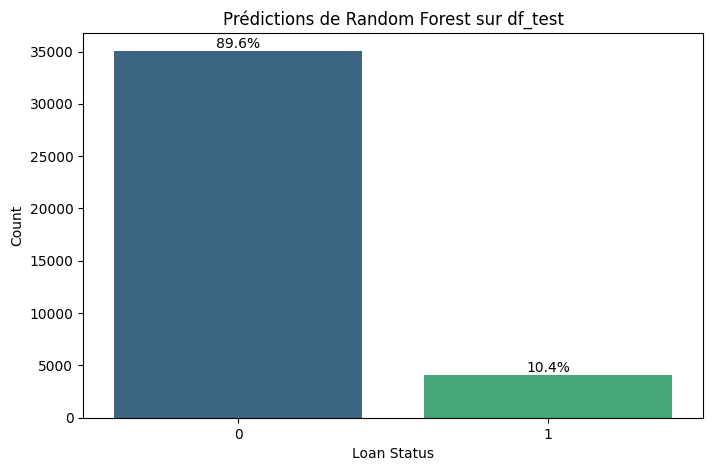

In [30]:
# Prédictions sur df_test
y_test_pred = best_model.predict(df_test)

# Affichage des résultats
result_counts = pd.Series(y_test_pred).value_counts()

# Créer un graphique à barres
plt.figure(figsize=(8, 5))
sns.barplot(x=result_counts.index, y=result_counts.values, palette='viridis')

# Ajouter les labels et le titre
plt.title('Prédictions de Random Forest sur df_test')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=result_counts.index, labels=result_counts.index, rotation=0)

# Ajouter le pourcentage au-dessus de chaque barre
total_count = result_counts.sum()
for index, value in enumerate(result_counts):
    percentage = (value / total_count) * 100
    plt.text(index, value, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

2. Prédiction XGBOOST

In [31]:
from xgboost import XGBClassifier

# Entraîner XGBoost sur df_train
best_model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Entraînement du modèle sur les données d'entraînement
best_model_xgb.fit(X_train, y_train)

# Faire des prédictions sur df_test
y_test_pred_xgb = best_model_xgb.predict(df_test)

# Si tu veux aussi les probabilités :
y_test_pred_proba_xgb = best_model_xgb.predict_proba(df_test)[:, 1]

# Créer un fichier de soumission pour XGBoost
submission_xgb = pd.DataFrame({
    'id': df_test['id'],  
    'loan_status': y_test_pred_xgb
})

# Sauvegarder le fichier de soumission en CSV
submission_xgb.to_csv('submission_XGBoost.csv', index=False)

print("Fichier de soumission XGBoost créé avec succès.")

Fichier de soumission XGBoost créé avec succès.


In [32]:
# Afficher les 20 premières lignes des prédictions XGBoost
result_xgb = pd.DataFrame({
    'id': df_test['id'],
    'loan_status_pred': y_test_pred_xgb
})
print(result_xgb.head(20))

       id  loan_status_pred
0   58645                 1
1   58646                 0
2   58647                 0
3   58648                 0
4   58649                 0
5   58650                 1
6   58651                 0
7   58652                 0
8   58653                 0
9   58654                 0
10  58655                 0
11  58656                 0
12  58657                 0
13  58658                 0
14  58659                 0
15  58660                 0
16  58661                 0
17  58662                 0
18  58663                 0
19  58664                 0


loan_status_pred
0    34574
1     4524
Name: count, dtype: int64


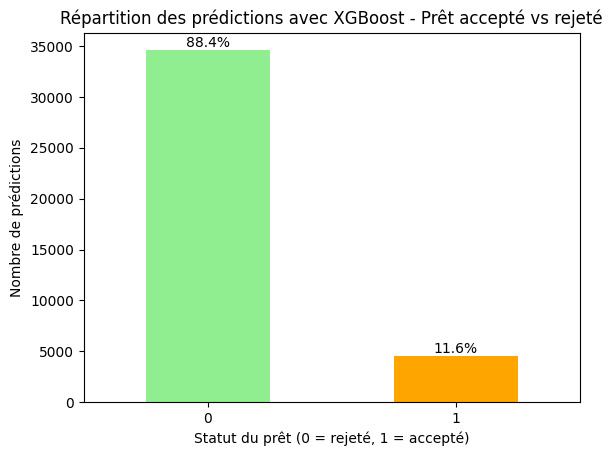

In [33]:
# Créer un DataFrame pour résumer les prédictions XGBoost
predictions_summary_xgb = result_xgb['loan_status_pred'].value_counts()

# Calculer les pourcentages pour chaque classe
percentages = predictions_summary_xgb / predictions_summary_xgb.sum() * 100

# Afficher les valeurs des prédictions
print(predictions_summary_xgb)

# Créer un graphique à barres pour XGBoost
ax = predictions_summary_xgb.plot(kind='bar', color=['lightgreen', 'orange'])

# Ajouter les pourcentages ou les valeurs au-dessus des barres
for i in ax.containers:
    ax.bar_label(i, labels=[f'{val:.1f}%' for val in percentages], label_type='edge')

# Ajouter les titres et étiquettes
plt.title('Répartition des prédictions avec XGBoost - Prêt accepté vs rejeté')
plt.xlabel('Statut du prêt (0 = rejeté, 1 = accepté)')
plt.ylabel('Nombre de prédictions')
plt.xticks(rotation=0)

# Afficher le graphique
plt.show()

## Optimiser Tous les Modèles

### Conclusion sur le Choix du Modèle
Choisir Random Forest pour les prédictions sur df_test est judicieux, notamment parce que ce modèle excelle dans la gestion de datasets comportant de nombreuses variables, tout en offrant des performances solides grâce à son approche basée sur des arbres décisionnels multiples. De plus, il est capable de capter des relations complexes et des interactions entre les variables sans nécessiter de transformation extensive des données.


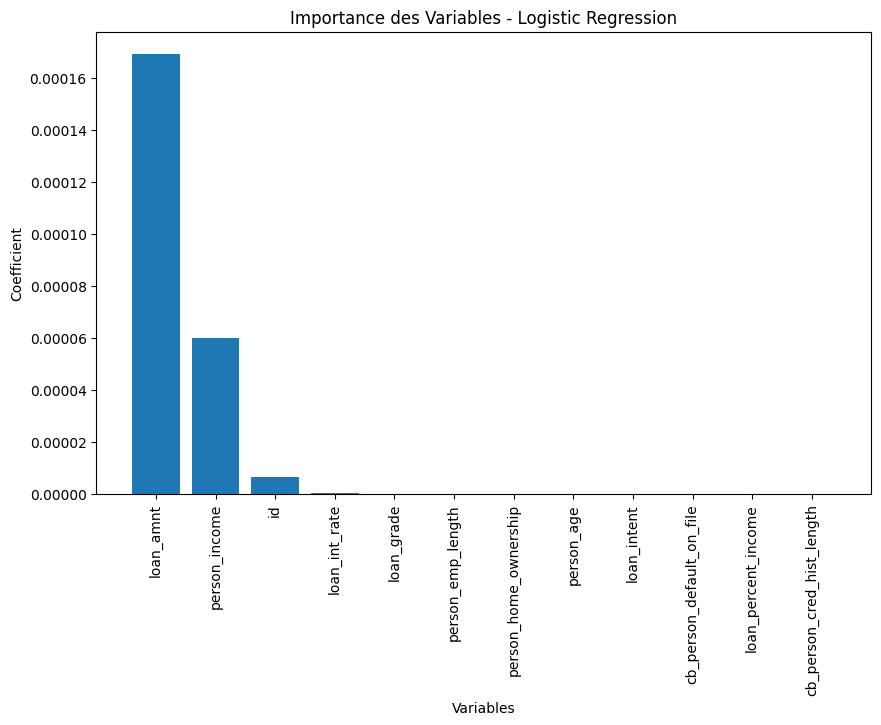

In [34]:
# Afficher l'importance des variables pour la régression logistique
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X, y)

# Importance des variables à partir des coefficients
importances = np.abs(logistic_model.coef_[0])
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables - Logistic Regression")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Coefficient")
plt.xlabel("Variables")
plt.show()

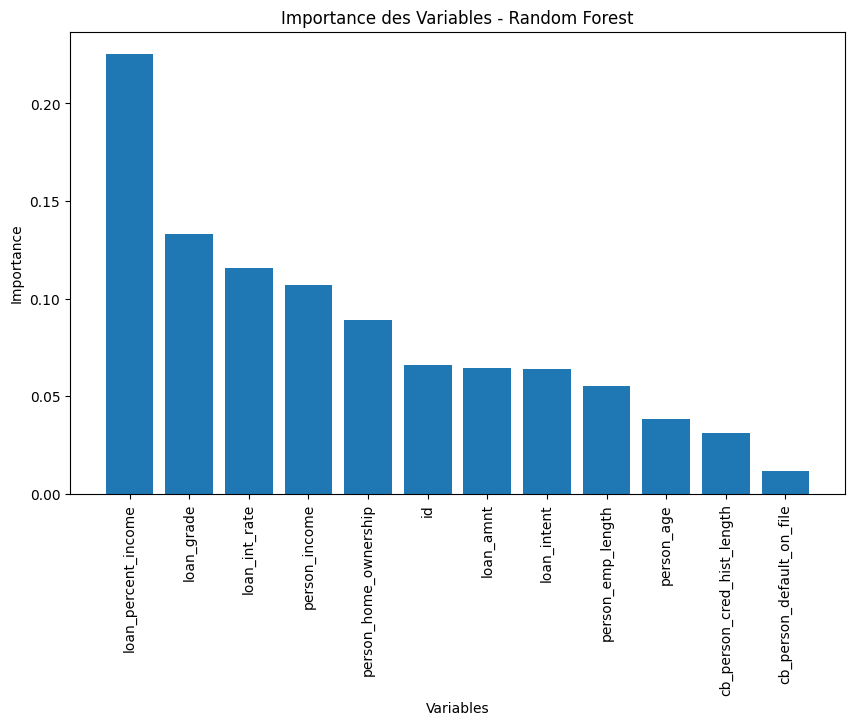

In [35]:
# Afficher l'importance des variables pour Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X, y)

# Importance des variables
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Variables")
plt.show()

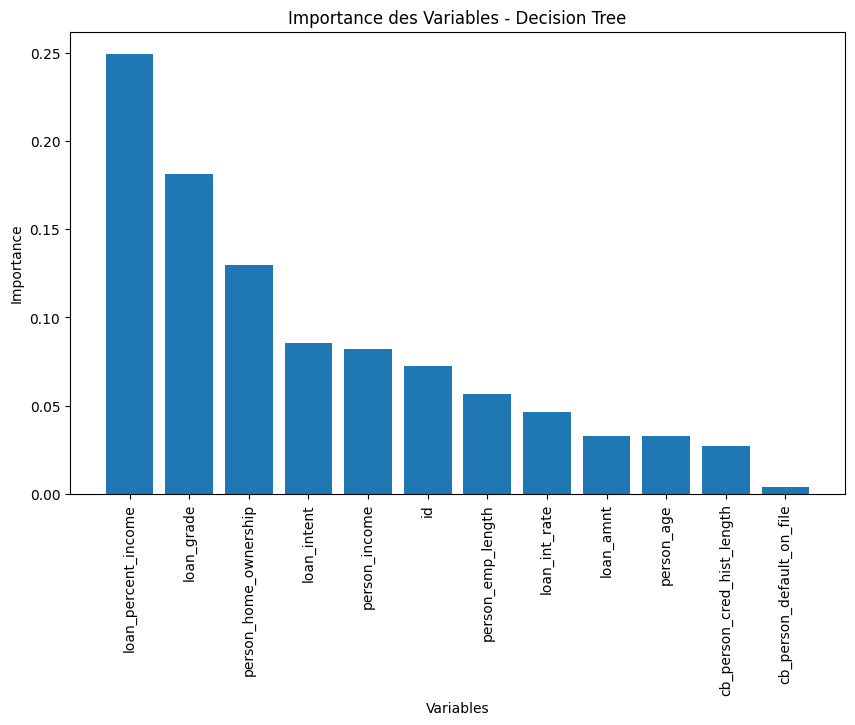

In [36]:
# Afficher l'importance des variables pour Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X, y)

# Importance des variables
importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables - Decision Tree")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Variables")
plt.show()

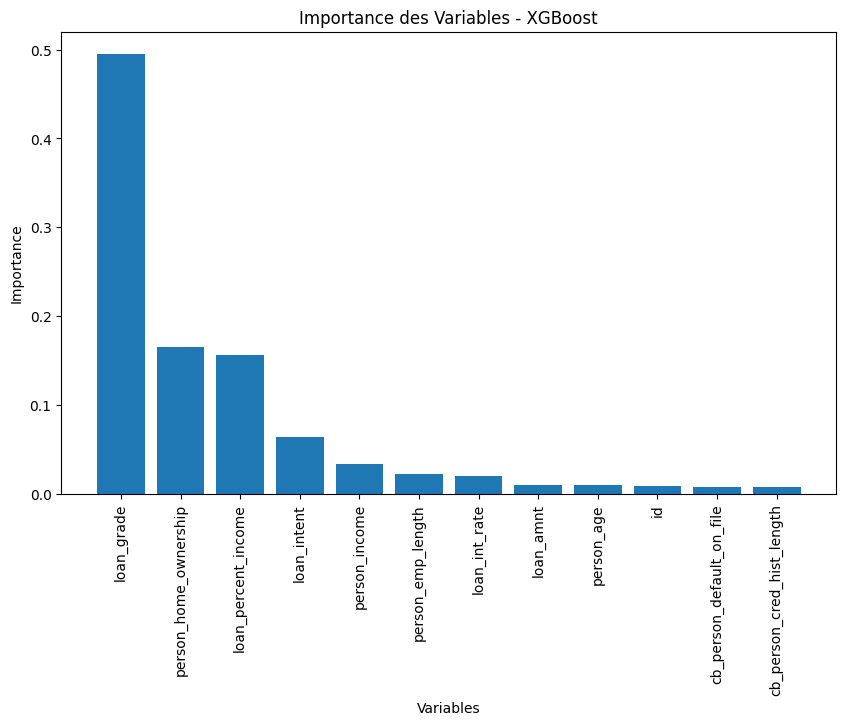

In [37]:
# Afficher l'importance des variables pour XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

# Importance des variables
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables - XGBoost")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Variables")
plt.show()